# Baby Names Exercise

US - Baby Names. We are going to use a subset of US Baby Names 
In the file it will be names from 2004 until 2014. Our goal is to find most popular names for that period.

Exercise Goals & Objectives:
- Learn and prctice Pandas
- Practice filtering DataFrame
- Practice method groupby()
- Practice Matplotlib scatter plot

Data Set:
- Using Pandas pd.read_csv() function read **BabyNames.csv** file, saved in the datasets folder

# 1. Import the necessary libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Read the dataset from BabyNames.csv

In [4]:
df = pd.read_csv('datasets/BabyNames.csv')
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


# 3. Drop the columns "Unnamed: 0" and "Id"

In [5]:
df.drop(["Unnamed: 0", "Id"], axis=1, inplace=True)

# 4. Are there any NaN missing values in the dataset

In [7]:
df.isnull().any()

Name      False
Year      False
Gender    False
State     False
Count     False
dtype: bool

# 5. See the last 10 entries in the dataset

In [8]:
df.tail(10)

,Name,Year,Gender,State,Count
1016385,Odin,2014,M,WY,5
1016386,Paxton,2014,M,WY,5
1016387,Raymond,2014,M,WY,5
1016388,Richard,2014,M,WY,5
1016389,Rowan,2014,M,WY,5
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5
1016394,Waylon,2014,M,WY,5


# 6. Is there more male or female names in the dataset?

Hint: use value_counts()

In [10]:
df['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

# 7. How many different names exist in the dataset?

In [12]:
len(df["Name"].unique())

17632

# 8. What is the most popular name?

In [16]:
names = df.groupby("Name")["Count"].sum()
names.sort_values(ascending=False).iloc[:1]

Name
Jacob    242874
Name: Count, dtype: int64

# 9. How many different names have the least occurrences?

In [22]:
least_occurrences = names.min()
names[names == least_occurrences].count()

2578

# 10. What is the most popular name in the state on NY in 2004?

In [41]:
ny = df[df["State"]=="NY"]
ny[ny["Count"]==ny["Count"].max()]

,Name,Year,Gender,State,Count
673685,Michael,2004,M,NY,2351


# 11. Get the number of the name Michael for each state in all years

In [48]:
name_state = df.groupby(["Name", "State"])["Count"].sum()
name_Michael = name_state.loc["Michael"]
name_Michael

State
AK      518
AL     3031
AR     1645
AZ     4615
CA    25945
CO     2766
CT     3013
DC      709
DE      798
FL    13482
GA     6868
HI      533
IA     1272
ID      840
IL     9708
IN     3866
KS     1636
KY     2652
LA     2795
MA     5463
MD     4301
ME      564
MI     6186
MN     2456
MO     3669
MS     1914
MT      481
NC     6088
ND      365
NE      920
NH      734
NJ     9193
NM     1375
NV     1777
NY    18648
OH     7987
OK     2200
OR     1654
PA     9923
RI      920
SC     2861
SD      427
TN     4095
TX    18350
UT     1724
VA     5669
VT      244
WA     3444
WI     2761
WV     1056
WY      264
Name: Count, dtype: int64

# 12. Plot all occurrences of the name Michael for all states as scatter plot

Hint: use plt.figure(figsize=(20,18))

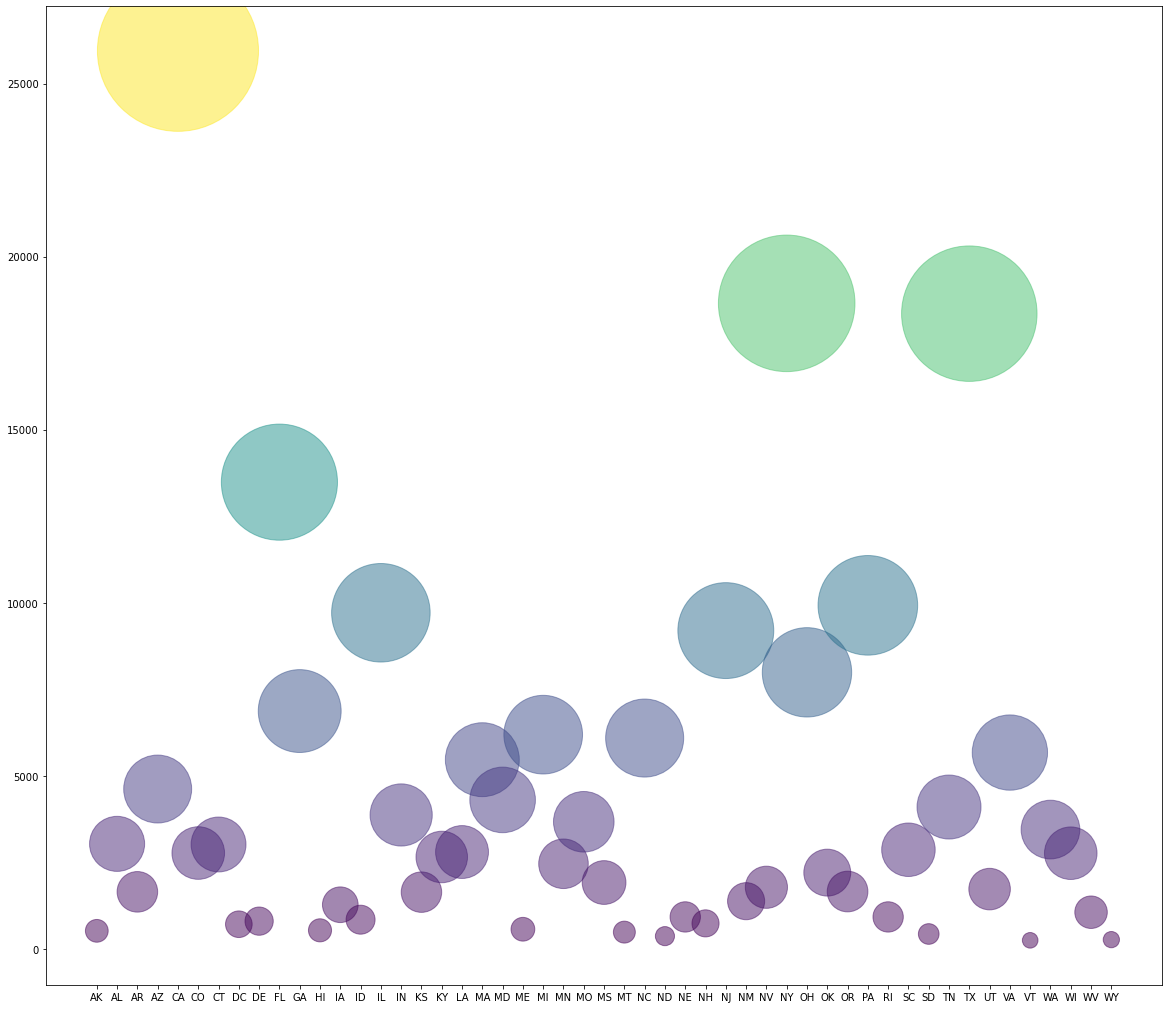

In [50]:
x = name_Michael.index
y = name_Michael.values
color = name_Michael.values
size = name_Michael.values
plt.figure(figsize=(20,18))
plt.scatter(x,y, s=size, c=color, alpha=0.5);